In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fft import rfft,rfftfreq,irfft

In [49]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

folder = "Raw Data Lift/"
files = np.sort(glob.glob(folder+'*.txt'))

In [50]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationDataLift.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media_Lift,Media_Drag,STD Lift,STD Drag\n');

L00.txt
L10.txt
L30.txt
L60.txt
L80.txt


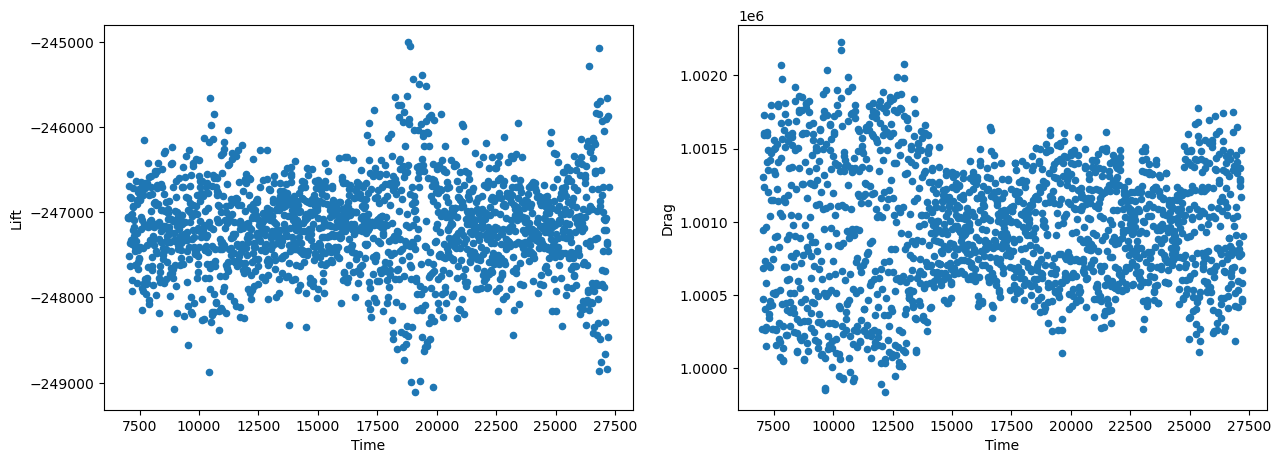

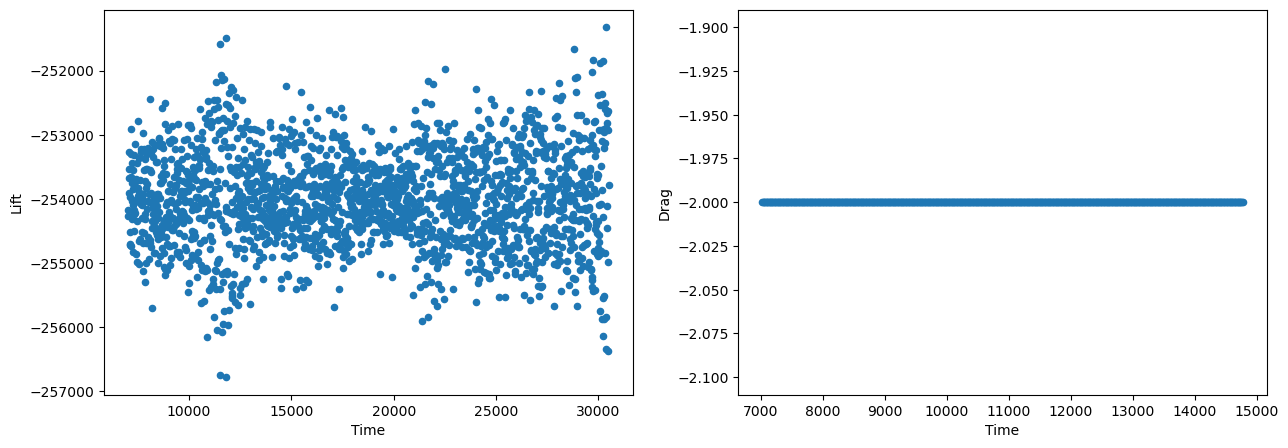

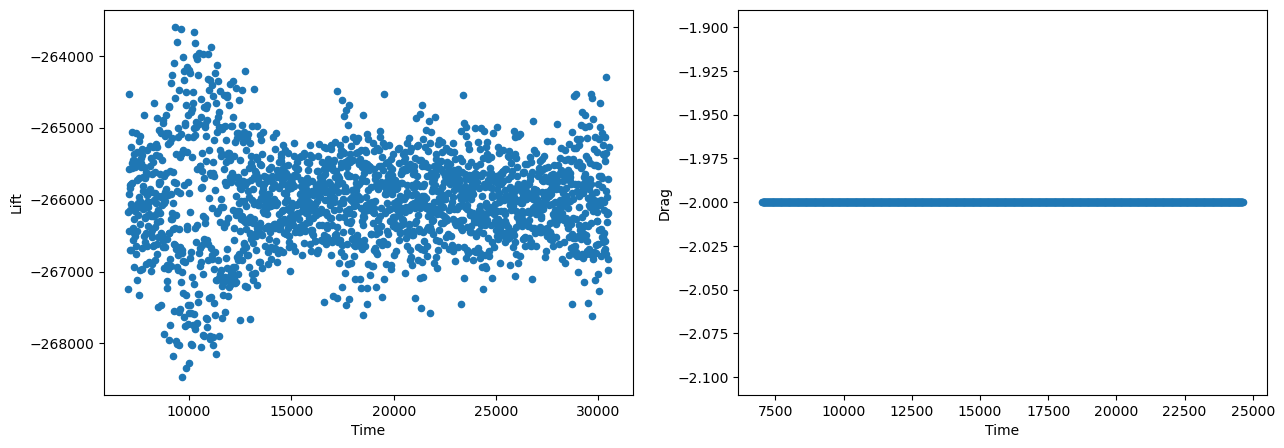

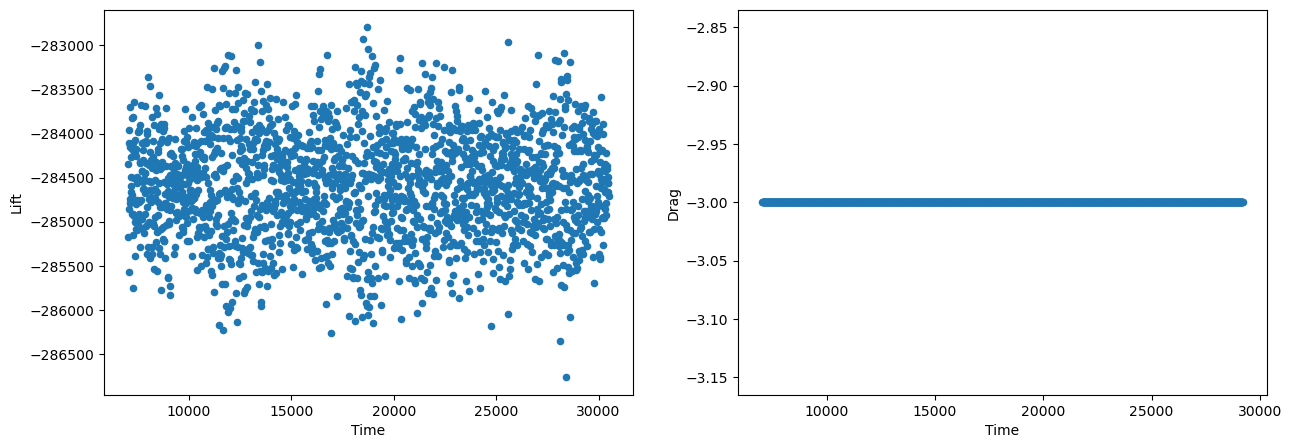

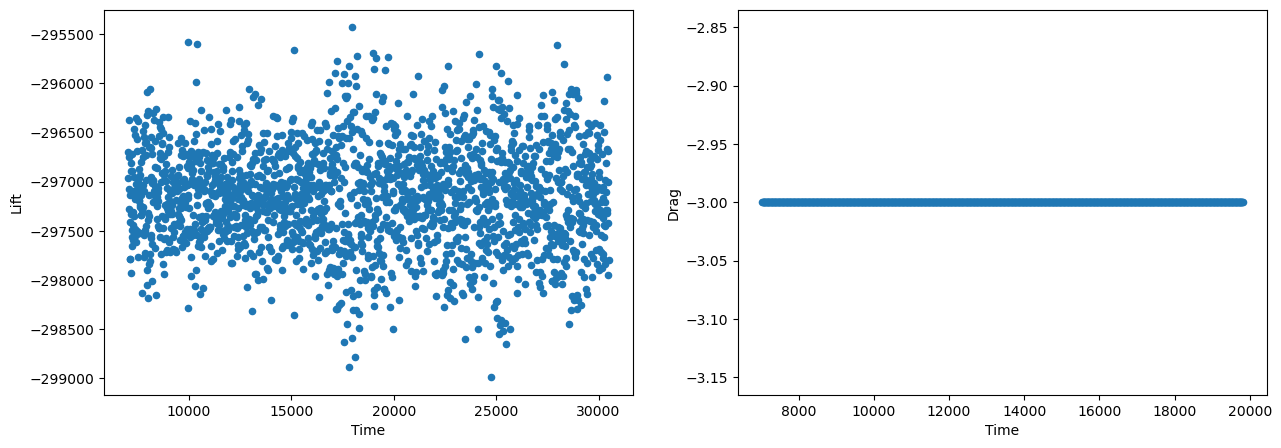

In [51]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[500:2500]
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()
    df=datos
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+4*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-4*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+4*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-4*stdDrag):
            df["Drag"][i]=np.nan
            
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+4*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-4*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+4*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-4*stdDrag):
            df["Drag"][i]=np.nan
    
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()
    
    df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
    
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    tag=k.split('\\')[1]
    print(tag)
   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(tag+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    

In [52]:
A = pd.read_csv(calibrationfile)
A

,txt,Media_Lift,Media_Drag,STD Lift,STD Drag
0,L00.txt,-247175.069936,1.000946e+06,547.710437,436.145352
1,L10.txt,-254008.743500,-2.000000e+00,727.107670,0.000000
2,L30.txt,-266010.513000,-2.000000e+00,669.558743,0.000000
3,L60.txt,-284587.595500,-3.000000e+00,586.878048,0.000000
4,L80.txt,-297153.639500,-3.000000e+00,507.876958,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

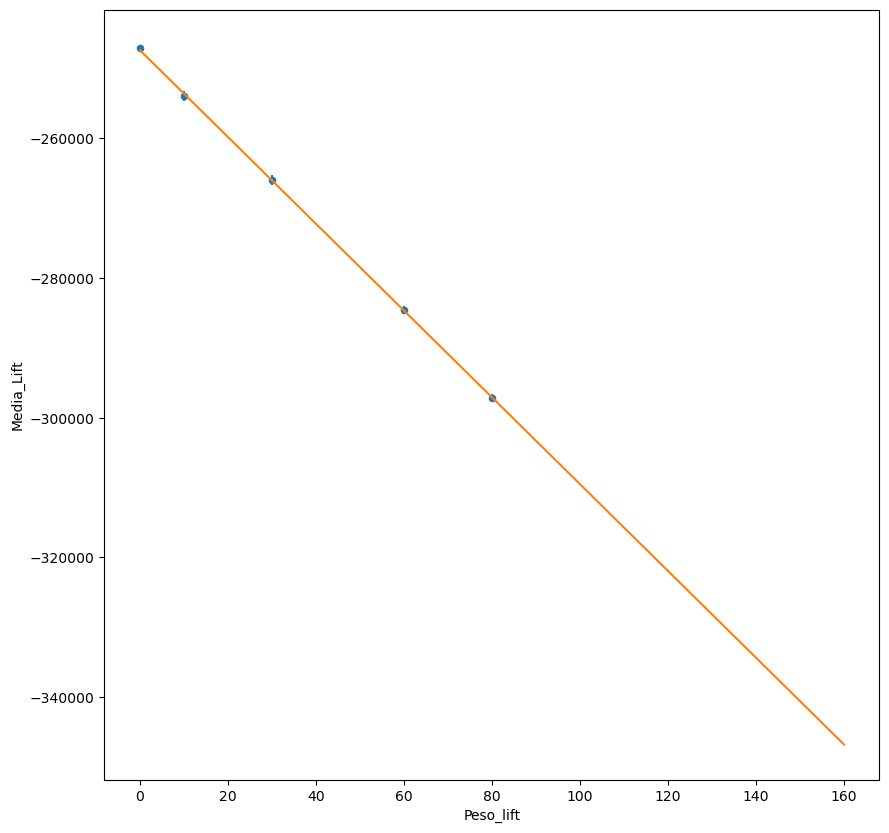

In [53]:
valores_masa_lift = np.array([0,10,30,60,80])

A["Peso_lift"]=valores_masa_lift
A["Error Masa"]=0.1

polyline = np.linspace(0, 160, num=160)

PoliLift = np.polyfit(A["Peso_lift"],A["Media_Lift"],1)

ajuste_lift = np.poly1d(PoliLift)

A.plot.scatter(y="Media_Lift", x="Peso_lift", yerr="STD Lift", xerr="Error Masa")
plt.plot(polyline, ajuste_lift(polyline))
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show


In [54]:
PoliLift

array([   -620.8560848 , -247436.29323441])